Hello! My name is Chase Sommer and I will work as a data scientist in the future. 

In this project I will be practicing my visualization skills with Python. The data I use is about job outcomes of college students based on majors.

The original data can be found here: https://www.census.gov/programs-surveys/acs/

The cleaned data that I will be using is from here: https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/

Overview of the data:
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Some questions I will answer are: 
* Do students in popular majors make more money than less popular majors?
* Which majors are predominantly males?
* Which majors have the most students?

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

rg = pd.read_csv('recent-grads.csv')

Below I return the first row of the dataset and we can see an example of each column.

In [2]:
rg.iloc[0,:]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
rg.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
rg.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
rg.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Below I will remove all rows with empty values because empty values will cause trouble with matplotlib.

In [6]:
raw_rg = rg.shape[0] 
print(raw_rg)

173


In [7]:
rg = rg.dropna()

In [8]:
clean_rg = rg.shape[0]
print(clean_rg)

172


Only one row was deleted. 

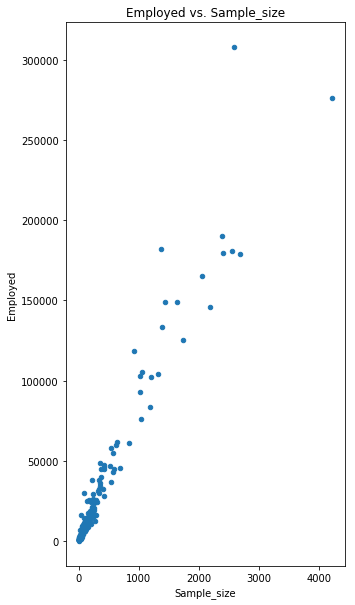

In [11]:
rg.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

Text(0.5, 1.0, 'Employed vs. Sample_size')

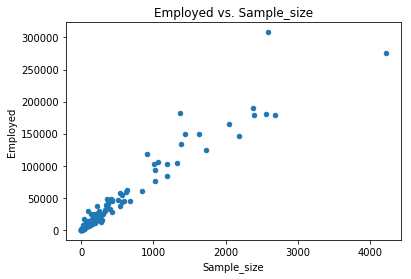

In [14]:
#This is another way to create a graph. The difference is that I am able to use `ax` to adjust the plot.
ax1 = rg.plot(x='Sample_size', y='Employed', kind='scatter')
ax1.set_title('Employed vs. Sample_size')

Text(0.5, 1.0, 'Employed vs. Median')

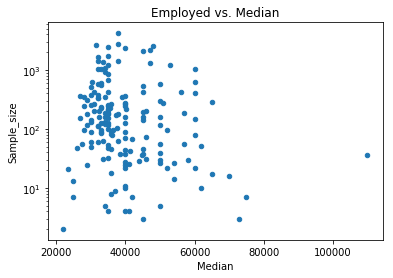

In [27]:
ax2 = rg.plot(y='Sample_size', x='Median', logy = True, kind='scatter')
ax2.set_title('Employed vs. Median')

Text(0.5, 1.0, 'Sample-size vs. Unemployment_rate')

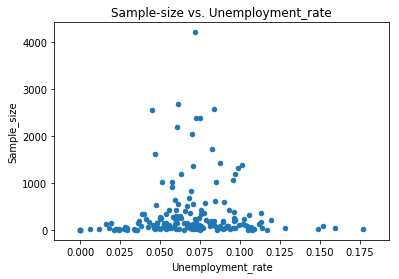

In [17]:
ax3 = rg.plot(y='Sample_size', x='Unemployment_rate', kind='scatter')
ax3.set_title('Sample-size vs. Unemployment_rate')

Text(0.5, 1.0, 'Full_time vs. Median')

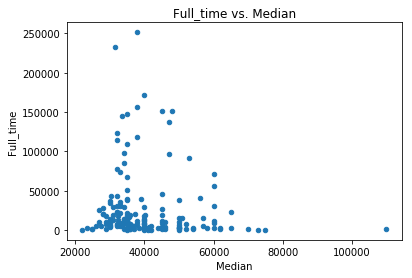

In [18]:
ax4 = rg.plot(y='Full_time', x='Median', kind='scatter')
ax4.set_title('Full_time vs. Median')

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

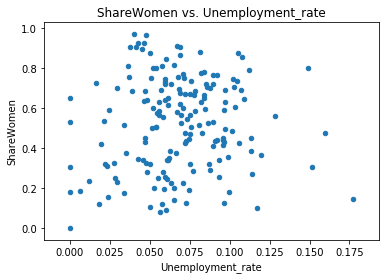

In [19]:
ax5 = rg.plot(y='ShareWomen', x='Unemployment_rate', kind='scatter')
ax5.set_title('ShareWomen vs. Unemployment_rate')

There does not seem to be a correlation between ShareWomen and Unemployment_rate.

Text(0.5, 1.0, 'Men vs Median')

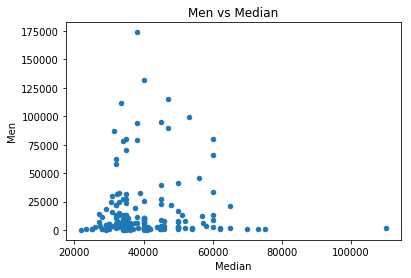

In [20]:
ax6 = rg.plot(y='Men', x='Median', kind='scatter')
ax6.set_title('Men vs Median')

Text(0.5, 1.0, 'Women vs. Median')

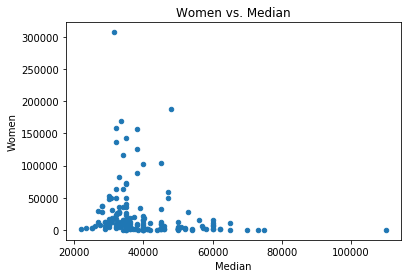

In [21]:
ax7 = rg.plot(y='Women', x='Median', kind='scatter')
ax7.set_title('Women vs. Median')

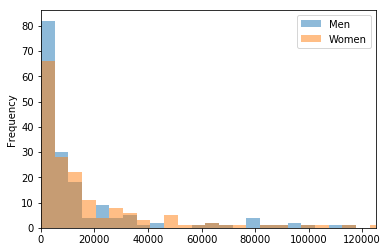

In [38]:
rg.plot(kind='hist', bins=60, x='Median',y=['Men','Women'],alpha=0.5, xlim = (0,125000))

I have heard of the wage gap between men and women, but I do not see evidence for it in this graph. This could be because this data only measures median pay of recent graduates, not positions with much experience. If I wanted to look further into the wage gap between genders, I would want to look at data with more senior positions.

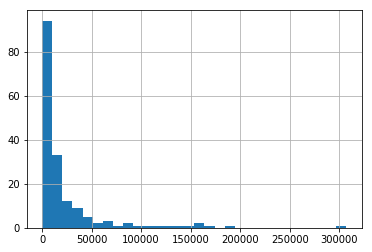

In [40]:
rg['Women'].hist(bins=30)

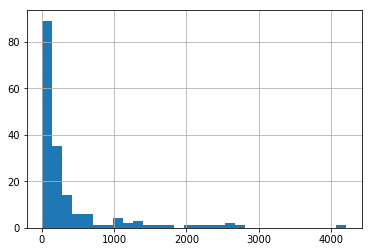

In [41]:
rg['Sample_size'].hist(bins=30)

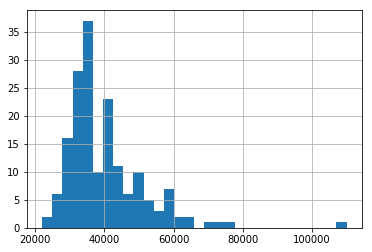

In [42]:
rg['Median'].hist(bins=30)

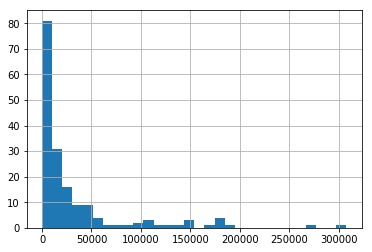

In [43]:
rg['Employed'].hist(bins=30)

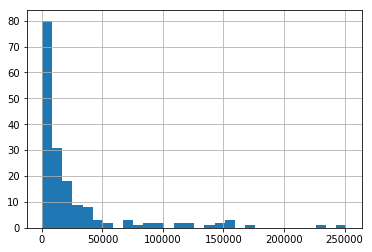

In [44]:
rg['Full_time'].hist(bins=30)

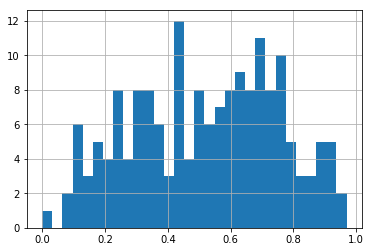

In [45]:
rg['ShareWomen'].hist(bins=30)

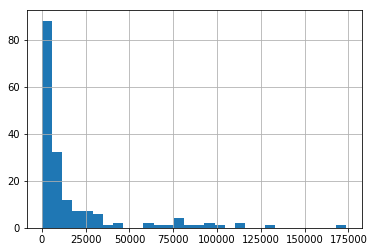

In [46]:
rg['Men'].hist(bins=30)

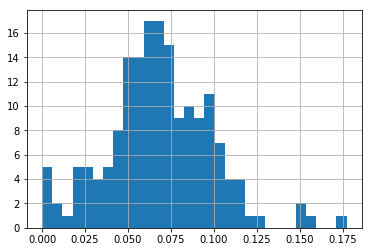

In [47]:
rg['Unemployment_rate'].hist(bins=30)

In [48]:
from pandas.plotting import scatter_matrix

`scatter_matrix` allows me to create a matrix of scatter plots and histograms! Very cool!

In [ ]:
scatter_matrix